<a href="https://colab.research.google.com/github/hjfuentes/Laboratorio-Datos-Sociales/blob/main/M2_Limpieza/Sesion_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteccion, analisis y correccion de valores perdidos

# Paquetes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importando datos

In [3]:
link = "https://raw.githubusercontent.com/SergioDP94/Talleres/refs/heads/main/EDA/missing.csv"
data = pd.read_csv(link)

## Detalle

In [4]:
data.head()

,atributo1,atributo2,atributo3,precio
0,5.7,6.8,6.6,22800
1,5.0,NaN,6.5,22000
2,6.2,NaN,6.6,25200
3,6.6,5.8,7.7,28700
4,NaN,5.8,7.0,29500


# Detección

## Revision de manera general

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   atributo1  164 non-null    float64
 1   atributo2  171 non-null    float64
 2   atributo3  154 non-null    float64
 3   precio     200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


## Deteccion

In [6]:
tabla1 = data.isna()

In [7]:
tabla1.sum()

,0
atributo1,36
atributo2,29
atributo3,46
precio,0


In [8]:
missing = pd.DataFrame({'Valores_Vacios': data.isnull().sum(),'Porcentajes': data.isnull().mean() * 100})
missing.sort_values(by='Porcentajes', ascending=False, inplace=True)
print(missing)

           Valores_Vacios  Porcentajes
atributo3              46         23.0
atributo1              36         18.0
atributo2              29         14.5
precio                  0          0.0


In [9]:
data.isnull()

,atributo1,atributo2,atributo3,precio
0,False,False,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,False,False
4,True,False,False,False
...,...,...,...,...
195,False,False,False,False
196,True,False,False,False
197,False,False,True,False
198,False,False,False,False


In [10]:
p_tabla = data.isnull().sum()

In [11]:
p_tabla = p_tabla.reset_index()

In [12]:
p_tabla['Porcentaje'] = p_tabla[0]/p_tabla[0].sum()

In [13]:
p_tabla

,index,0,Porcentaje
0,atributo1,36,0.324324
1,atributo2,29,0.261261
2,atributo3,46,0.414414
3,precio,0,0.000000


In [14]:
data.dropna()

,atributo1,atributo2,atributo3,precio
0,5.7,6.8,6.6,22800
3,6.6,5.8,7.7,28700
5,5.7,6.8,6.1,23400
6,5.4,8.0,6.3,16800
7,5.0,8.4,4.2,19800
...,...,...,...,...
189,5.3,6.6,5.4,27100
192,5.6,7.0,6.5,20900
195,5.9,7.3,5.4,23200
198,6.6,7.5,6.8,21600


## Visualizando

<Axes: >

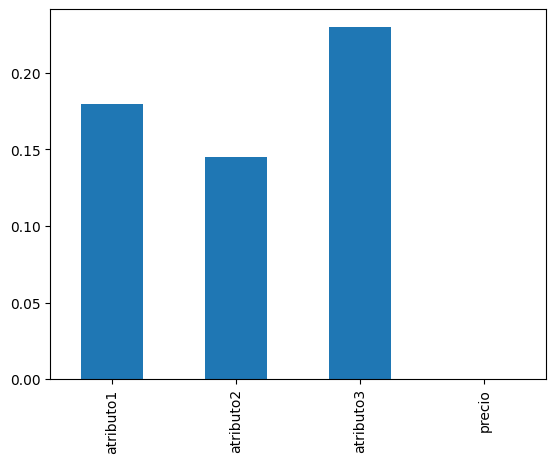

In [15]:
data.isnull().mean().plot(kind='bar')

# Analisis

## Visualizando

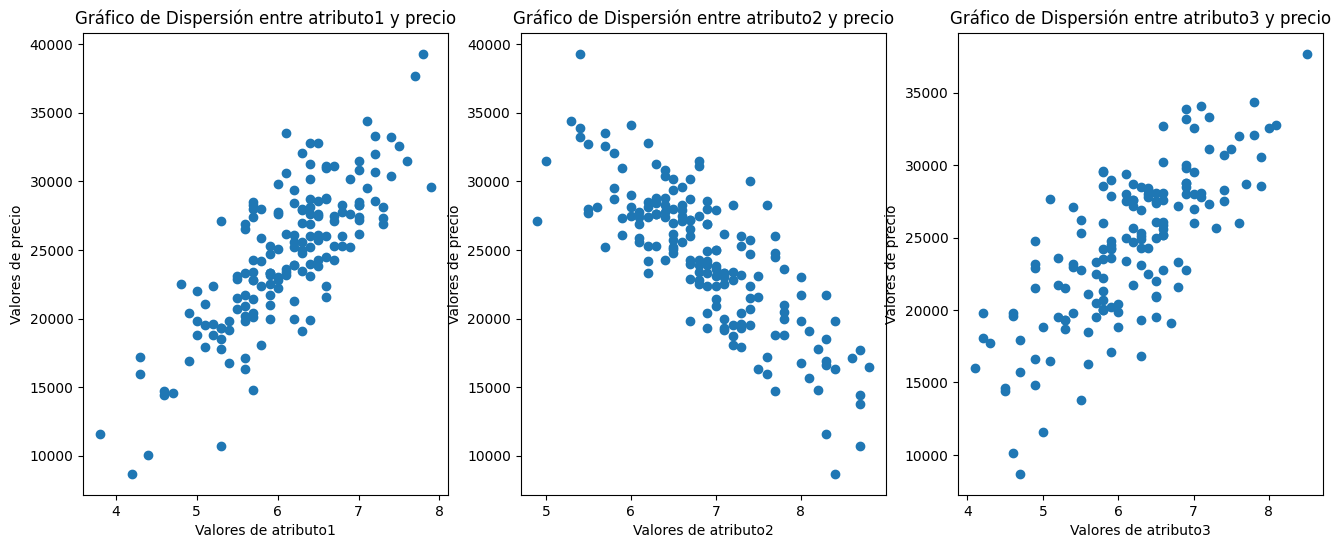

In [16]:
vars = ['atributo1','atributo2','atributo3']

fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data[vars[x]], data['precio'], marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
plt.show()

## Filas completas e incompletas

In [17]:
data.isnull().sum(axis=1)>0

,0
0,False
1,True
2,True
3,False
4,True
...,...
195,False
196,True
197,True
198,False


In [18]:
data['completo'] = np.where(data.isnull().sum(axis=1)==0,"Completo","Incompleto")
data_c = data.query("completo=='Completo'")
data_i = data.query("completo=='Incompleto'")

<Axes: ylabel='count'>

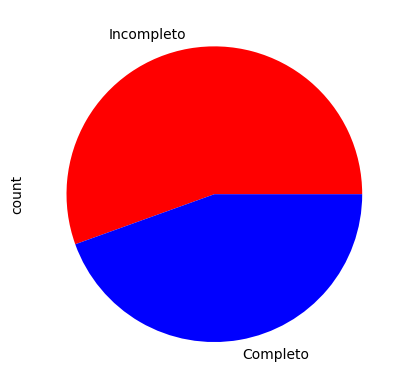

In [19]:
data.completo.value_counts().plot(kind='pie',colors = ['r','b'])

## Perdida de información multiple

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   atributo1  164 non-null    float64
 1   atributo2  171 non-null    float64
 2   atributo3  154 non-null    float64
 3   precio     200 non-null    int64  
 4   completo   200 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [21]:
data_c.shape

(89, 5)

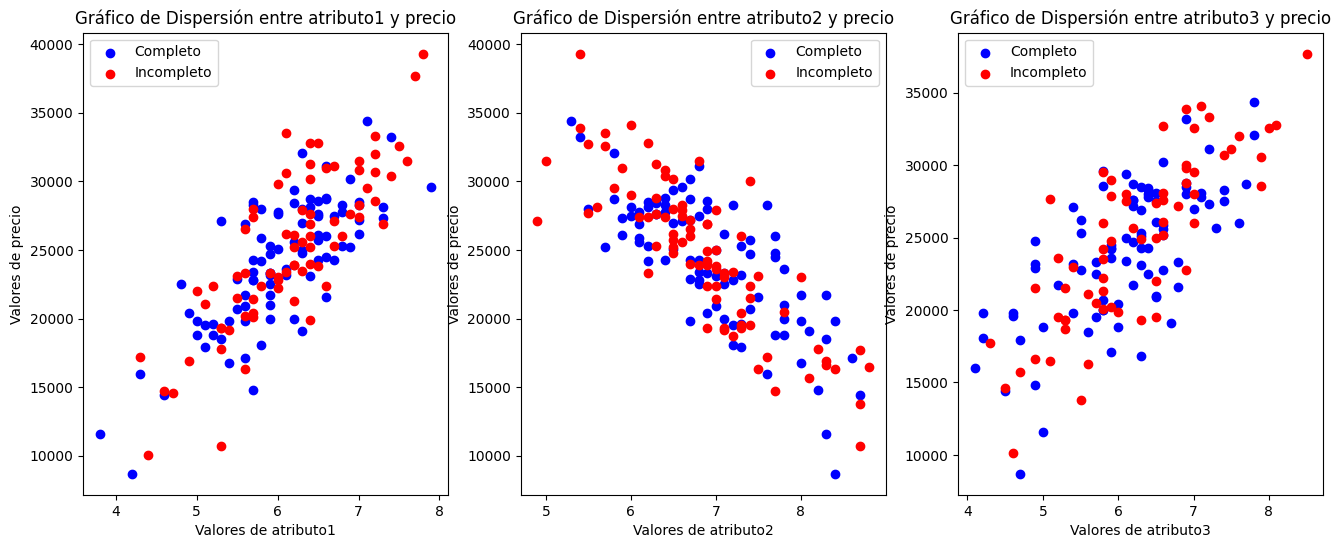

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_c[vars[x]], data_c['precio'], label='Completo',c='b', marker='o')
  axs[x].scatter(data_i[vars[x]], data_i['precio'], label='Incompleto',c='r', marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()

## Distribución actual

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

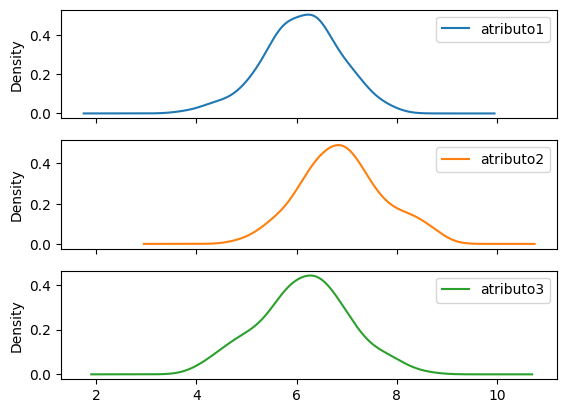

In [24]:
data[vars].plot.kde(subplots=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

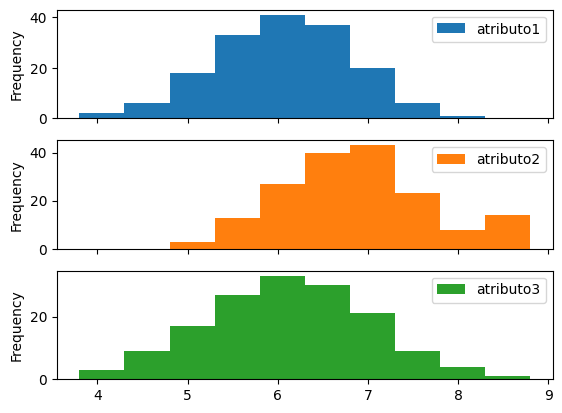

In [25]:
data[vars].plot.hist(subplots=True)

In [26]:
data._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.582469,0.634946,0.793816
atributo2,-0.582469,1.000000,-0.573408,-0.806845
atributo3,0.634946,-0.573408,1.000000,0.747703
precio,0.793816,-0.806845,0.747703,1.000000


In [28]:
data

,atributo1,atributo2,atributo3,precio,completo
0,5.7,6.8,6.6,22800,Completo
1,5.0,NaN,6.5,22000,Incompleto
2,6.2,NaN,6.6,25200,Incompleto
3,6.6,5.8,7.7,28700,Completo
4,NaN,5.8,7.0,29500,Incompleto
...,...,...,...,...,...
195,5.9,7.3,5.4,23200,Completo
196,NaN,7.0,5.2,23600,Incompleto
197,5.9,7.1,NaN,23300,Incompleto
198,6.6,7.5,6.8,21600,Completo


# Correccíon

## Inputacion con cero

### Imputando datos

In [29]:
data_filled_0 = data.fillna(0)

In [31]:
data_filled_0#.isnull().sum()

,atributo1,atributo2,atributo3,precio,completo
0,5.7,6.8,6.6,22800,Completo
1,5.0,0.0,6.5,22000,Incompleto
2,6.2,0.0,6.6,25200,Incompleto
3,6.6,5.8,7.7,28700,Completo
4,0.0,5.8,7.0,29500,Incompleto
...,...,...,...,...,...
195,5.9,7.3,5.4,23200,Completo
196,0.0,7.0,5.2,23600,Incompleto
197,5.9,7.1,0.0,23300,Incompleto
198,6.6,7.5,6.8,21600,Completo


### Distribucion nueva

In [45]:
data[vars].mean()

,0
atributo1,6.100610
atributo2,6.905263
atributo3,6.148701


In [44]:
data_filled_0[vars].mean()

,0
atributo1,5.0025
atributo2,5.9040
atributo3,4.7345


In [36]:
#medias={"inicial":data[vars].mean(),"filled_0":data_filled_0[vars].mean()}
medias=[data[vars].mean(),data_filled_0[vars].mean()]

medias_df = pd.DataFrame(medias, columns=['inicial','filled_0'])
medias_df
print(type(data_filled_0[vars].mean()))

<class 'pandas.core.series.Series'>


In [49]:
df_medias=pd.concat([data[vars].mean().to_frame(),data_filled_0[vars].mean().to_frame()],axis=1)
df_medias.columns=['inicial','filled_0']
df_medias

,inicial,filled_0
atributo1,6.100610,5.0025
atributo2,6.905263,5.9040
atributo3,6.148701,4.7345


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

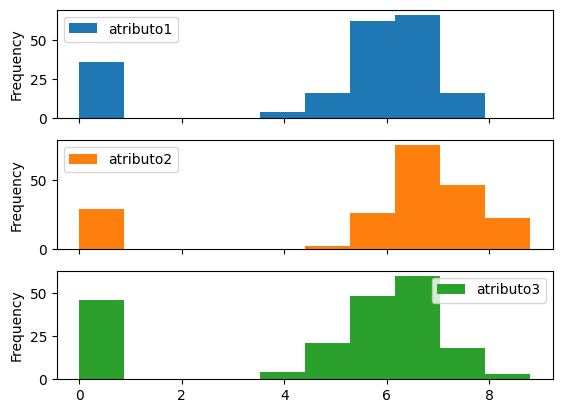

In [ ]:
data_filled_0[vars].plot.hist(subplots=True)

### Dispersion nueva

In [ ]:
col={True:'r',False:'b'}

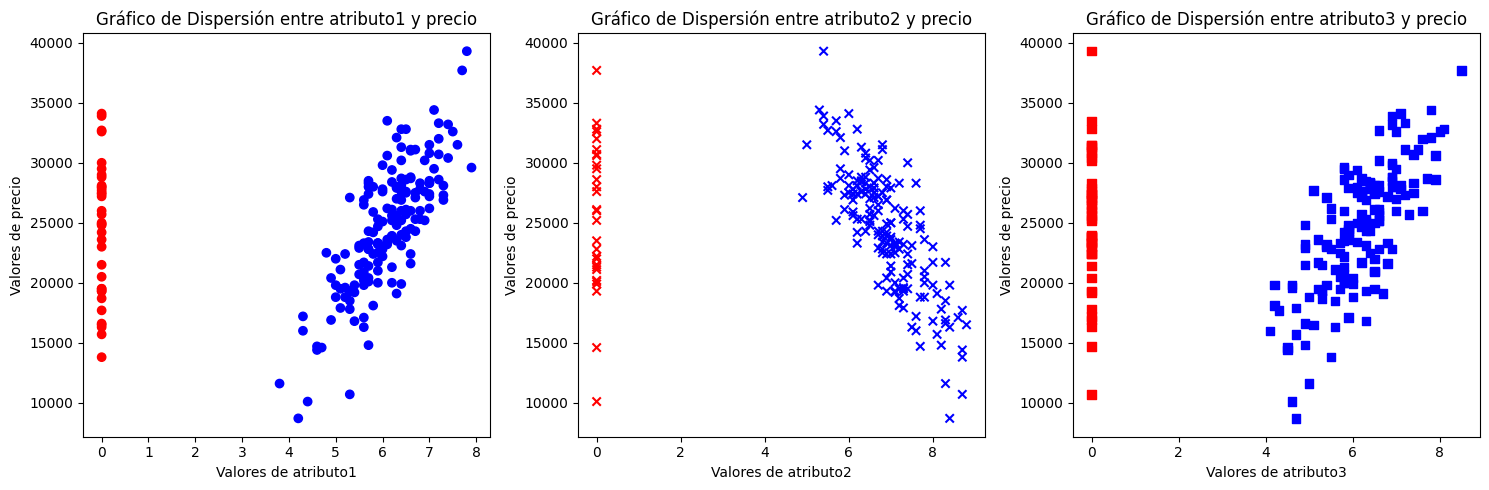

In [ ]:
# Crear subplots de 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(data_filled_0['atributo1'], data_filled_0['precio'],c=data.isnull().atributo1.map(col), label='atributo1', marker='o')
axs[0].set_xlabel('Valores de atributo1')
axs[0].set_ylabel('Valores de precio')
axs[0].set_title('Gráfico de Dispersión entre atributo1 y precio')

axs[1].scatter(data_filled_0['atributo2'], data_filled_0['precio'],c=data.isnull().atributo2.map(col), label='atributo2', marker='x')
axs[1].set_xlabel('Valores de atributo2')
axs[1].set_ylabel('Valores de precio')
axs[1].set_title('Gráfico de Dispersión entre atributo2 y precio')

# Gráfico de dispersión para x3 vs. y
axs[2].scatter(data_filled_0['atributo3'], data_filled_0['precio'],c=data.isnull().atributo3.map(col), label='atributo3', marker='s')
axs[2].set_xlabel('Valores de atributo3')
axs[2].set_ylabel('Valores de precio')
axs[2].set_title('Gráfico de Dispersión entre atributo3 y precio')

# Mostrar los subplots
plt.tight_layout()
plt.show()

/tmp/ipython-input-3928999234.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[x].legend()


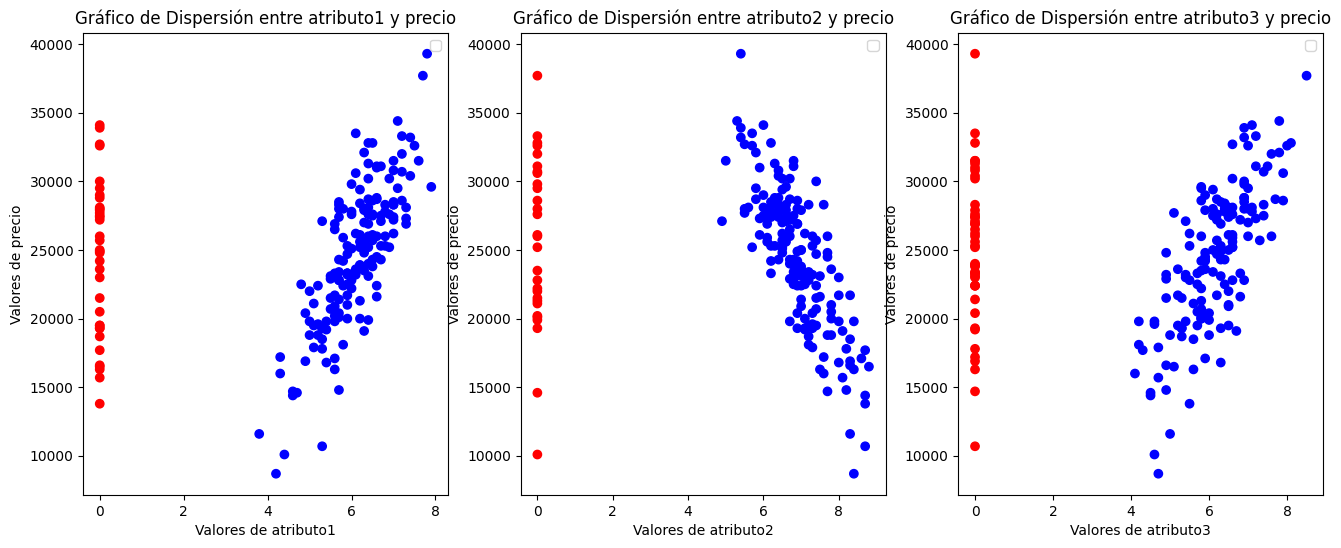

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_filled_0[vars[x]], data_filled_0['precio'], c=data.isnull()[vars[x]].map(col), marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()

In [ ]:
data._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.582469,0.634946,0.793816
atributo2,-0.582469,1.000000,-0.573408,-0.806845
atributo3,0.634946,-0.573408,1.000000,0.747703
precio,0.793816,-0.806845,0.747703,1.000000


In [ ]:
data_filled_0._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.232592,-0.174005,0.218069
atributo2,-0.232592,1.000000,-0.278807,-0.286245
atributo3,-0.174005,-0.278807,1.000000,0.143193
precio,0.218069,-0.286245,0.143193,1.000000


## Imputación por media

### Imputando datos

In [ ]:
data[vars].mean()

,0
atributo1,6.100610
atributo2,6.905263
atributo3,6.148701


In [ ]:
data_filled_mean = data.fillna(data[vars].mean())

In [ ]:
data_filled_mean[vars].mean()

,0
atributo1,6.100610
atributo2,6.905263
atributo3,6.148701


In [ ]:
data[vars].std()

,0
atributo1,0.761859
atributo2,0.816468
atributo3,0.887770


In [ ]:
data_filled_mean[vars].std()

,0
atributo1,0.689512
atributo2,0.754635
atributo3,0.778430


### Distribucion nueva

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

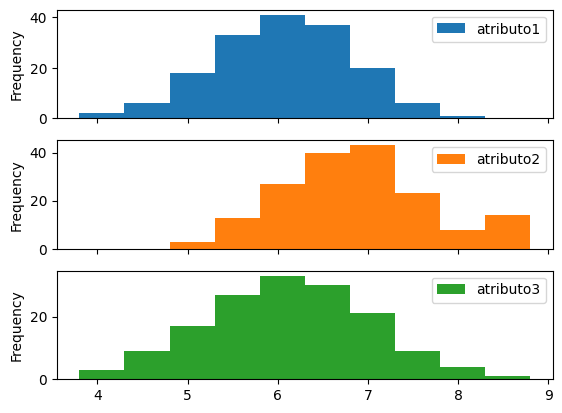

In [ ]:
data[vars].plot.hist(subplots=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

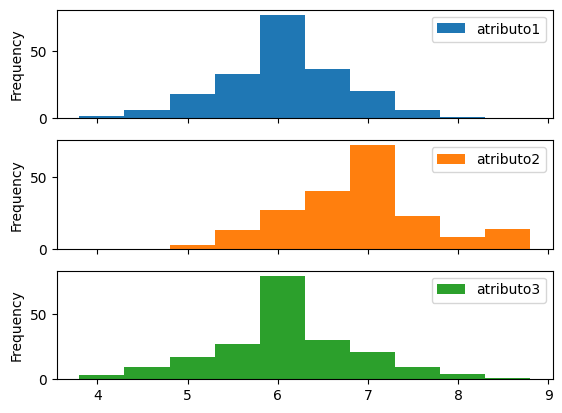

In [ ]:
data_filled_mean[vars].plot.hist(subplots=True)

### Dispersion nueva

/tmp/ipython-input-3400528174.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[x].legend()


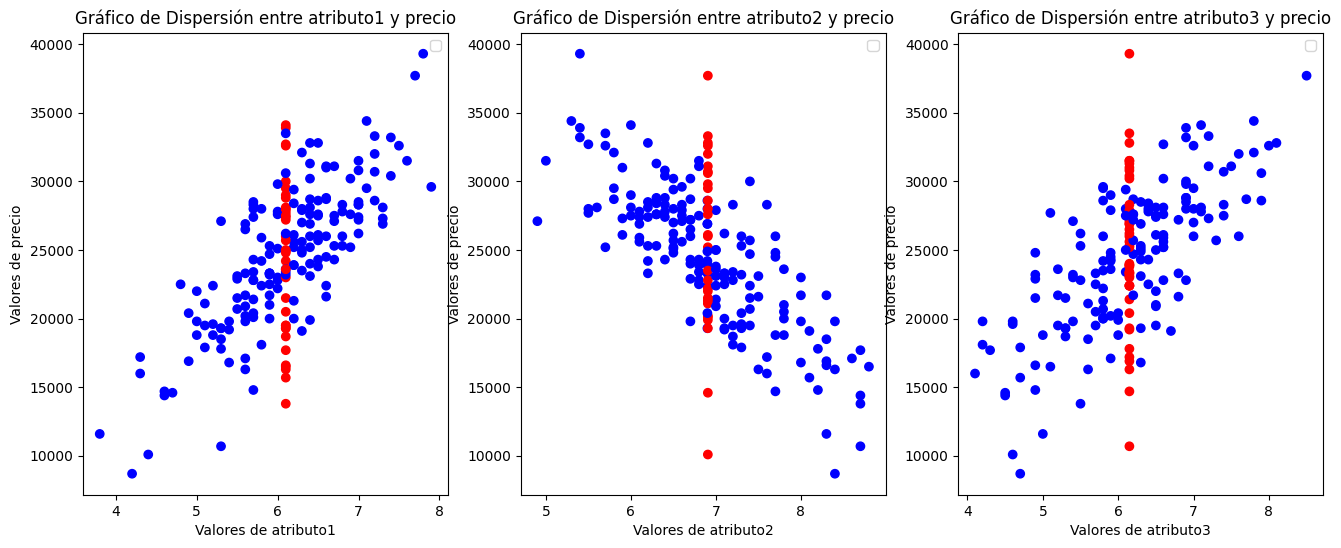

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_filled_mean[vars[x]], data_filled_mean['precio'], c=data.isnull()[vars[x]].map(col), marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()

In [ ]:
data._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.582469,0.634946,0.793816
atributo2,-0.582469,1.000000,-0.573408,-0.806845
atributo3,0.634946,-0.573408,1.000000,0.747703
precio,0.793816,-0.806845,0.747703,1.000000


In [ ]:
data_filled_mean._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.436446,0.491548,0.711280
atributo2,-0.436446,1.000000,-0.416356,-0.721654
atributo3,0.491548,-0.416356,1.000000,0.648556
precio,0.711280,-0.721654,0.648556,1.000000


## Metodos basados en muestreo

### Imputando datos

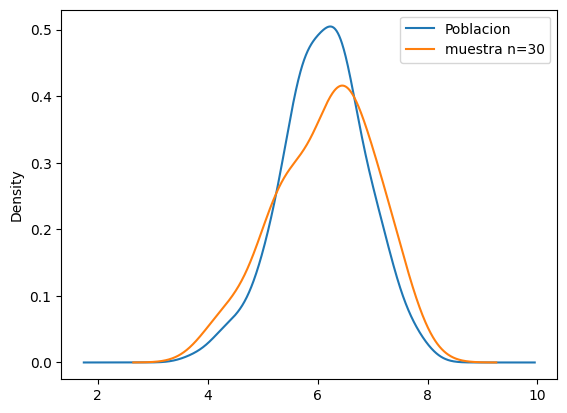

In [ ]:
data.atributo1.plot.kde(label='Poblacion')
data.atributo1.dropna().sample(30).plot.kde(label='muestra n=30')
plt.legend()

In [ ]:
data.atributo1.dropna().sample(1)#elije un valor al azar

,atributo1
5,5.7


In [ ]:
data_filled_fordward = data.ffill()

In [ ]:
data.head(10)

,atributo1,atributo2,atributo3,precio,completo
0,5.7,6.8,6.6,22800,Completo
1,5.0,NaN,6.5,22000,Incompleto
2,6.2,NaN,6.6,25200,Incompleto
3,6.6,5.8,7.7,28700,Completo
4,NaN,5.8,7.0,29500,Incompleto
5,5.7,6.8,6.1,23400,Completo
6,5.4,8.0,6.3,16800,Completo
7,5.0,8.4,4.2,19800,Completo
8,5.2,6.9,NaN,22400,Incompleto
9,5.2,7.8,6.0,18800,Completo


In [ ]:
data_filled_fordward.head(10)

,atributo1,atributo2,atributo3,precio,completo
0,5.7,6.8,6.6,22800,Completo
1,5.0,6.8,6.5,22000,Incompleto
2,6.2,6.8,6.6,25200,Incompleto
3,6.6,5.8,7.7,28700,Completo
4,6.6,5.8,7.0,29500,Incompleto
5,5.7,6.8,6.1,23400,Completo
6,5.4,8.0,6.3,16800,Completo
7,5.0,8.4,4.2,19800,Completo
8,5.2,6.9,4.2,22400,Incompleto
9,5.2,7.8,6.0,18800,Completo


In [ ]:
data_filled_fordward[vars].mean()

,0
atributo1,6.0900
atributo2,6.9050
atributo3,6.0825


In [ ]:
data[vars].mean()

,0
atributo1,6.100610
atributo2,6.905263
atributo3,6.148701


In [ ]:
data[vars].std()

,0
atributo1,0.761859
atributo2,0.816468
atributo3,0.887770


In [ ]:
data_filled_fordward[vars].std()

,0
atributo1,0.768082
atributo2,0.807238
atributo3,0.873590


### Distribucion nueva

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

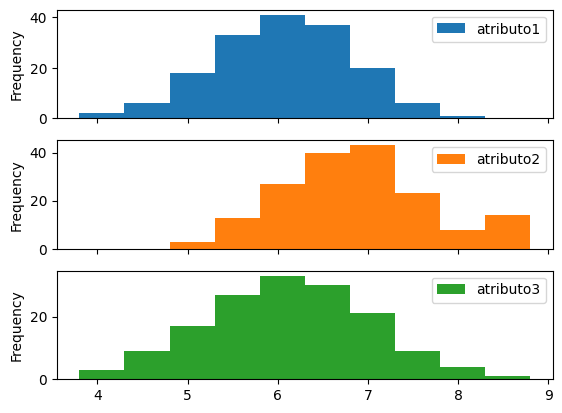

In [ ]:
data[vars].plot.hist(subplots=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

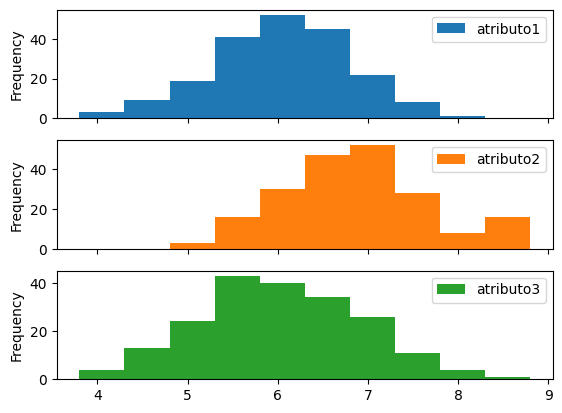

In [ ]:
data_filled_fordward[vars].plot.hist(subplots=True)

### Dispersion nueva

/tmp/ipython-input-3145848020.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[x].legend()


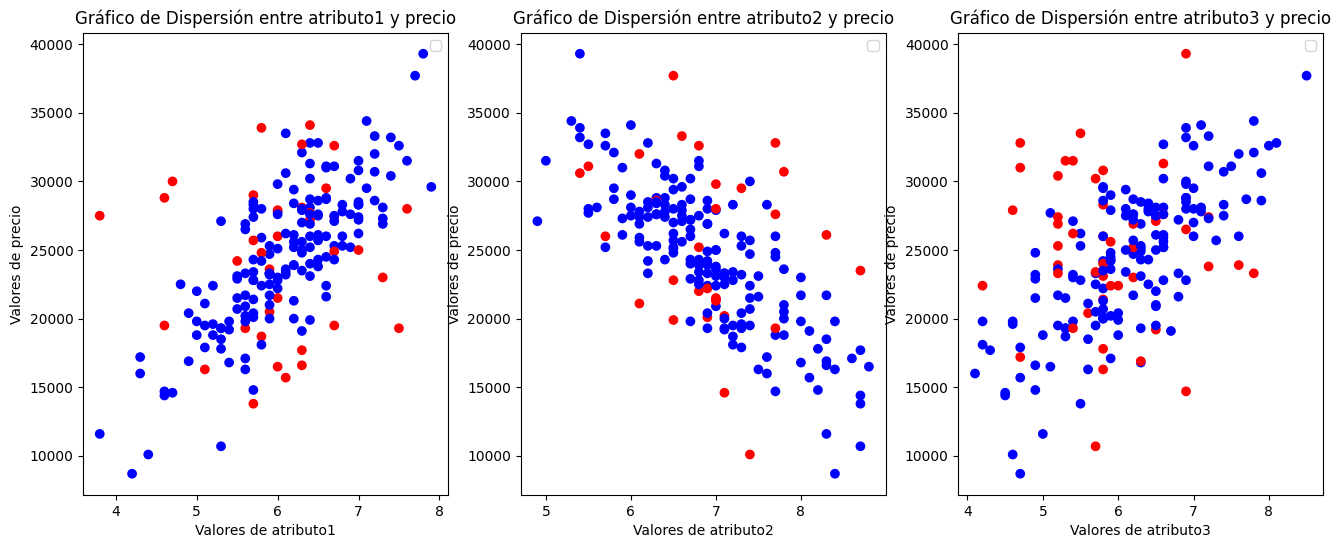

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_filled_fordward[vars[x]], data_filled_fordward['precio'], c=data.isnull()[vars[x]].map(col), marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()

In [ ]:
data._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.582469,0.634946,0.793816
atributo2,-0.582469,1.000000,-0.573408,-0.806845
atributo3,0.634946,-0.573408,1.000000,0.747703
precio,0.793816,-0.806845,0.747703,1.000000


In [ ]:
data_filled_fordward._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.420878,0.376142,0.647239
atributo2,-0.420878,1.000000,-0.400491,-0.708900
atributo3,0.376142,-0.400491,1.000000,0.557767
precio,0.647239,-0.708900,0.557767,1.000000


## Imputación por K vecinos mas cercanos

In [ ]:
from sklearn.impute import KNNImputer

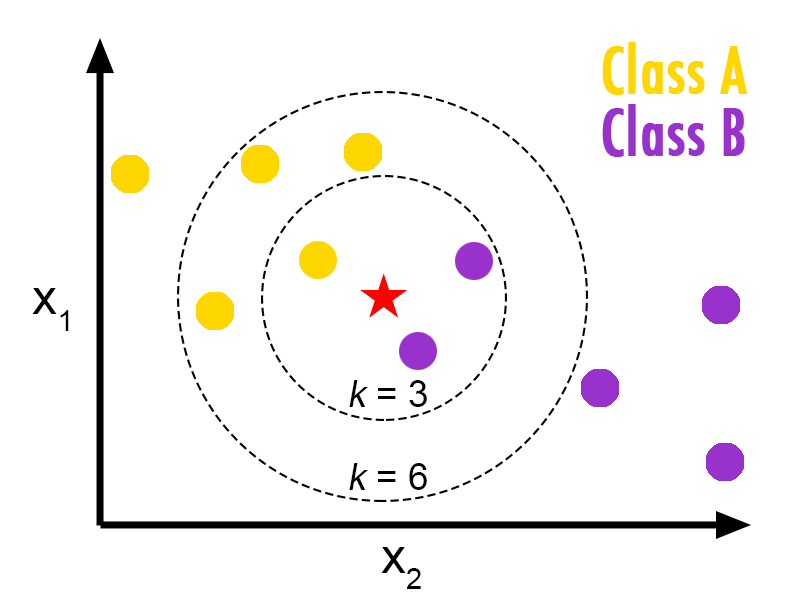

### Imputando datos

In [ ]:
data[vars]

,atributo1,atributo2,atributo3
0,5.7,6.8,6.6
1,5.0,NaN,6.5
2,6.2,NaN,6.6
3,6.6,5.8,7.7
4,NaN,5.8,7.0
...,...,...,...
195,5.9,7.3,5.4
196,NaN,7.0,5.2
197,5.9,7.1,NaN
198,6.6,7.5,6.8


In [ ]:
200**0.5

14.142135623730951

In [ ]:
# creando maquina
knn_imputer = KNNImputer(n_neighbors=14)

# Imputar valores faltantes utilizando KNN
data_imputed_knn = knn_imputer.fit_transform(data[['atributo1','atributo2','atributo3','precio']])

data_imputed_knn[0:10]#para solo ver las 10 primeras filas

array([[5.70000000e+00, 6.80000000e+00, 6.60000000e+00, 2.28000000e+04],
       [5.00000000e+00, 7.27857143e+00, 6.50000000e+00, 2.20000000e+04],
       [6.20000000e+00, 6.69285714e+00, 6.60000000e+00, 2.52000000e+04],
       [6.60000000e+00, 5.80000000e+00, 7.70000000e+00, 2.87000000e+04],
       [6.63571429e+00, 5.80000000e+00, 7.00000000e+00, 2.95000000e+04],
       [5.70000000e+00, 6.80000000e+00, 6.10000000e+00, 2.34000000e+04],
       [5.40000000e+00, 8.00000000e+00, 6.30000000e+00, 1.68000000e+04],
       [5.00000000e+00, 8.40000000e+00, 4.20000000e+00, 1.98000000e+04],
       [5.20000000e+00, 6.90000000e+00, 5.83571429e+00, 2.24000000e+04],
       [5.20000000e+00, 7.80000000e+00, 6.00000000e+00, 1.88000000e+04]])

In [ ]:
# Convertir el resultado a un DataFrame
data_imputed_knn = pd.DataFrame(data_imputed_knn, columns=['atributo1','atributo2','atributo3','precio'])

#data_imputed_knn = pd.concat([data_imputed_knn, data['precio']], axis=1)

# Verificar el DataFrame resultante
data_imputed_knn

,atributo1,atributo2,atributo3,precio
0,5.700000,6.800000,6.600000,22800.0
1,5.000000,7.278571,6.500000,22000.0
2,6.200000,6.692857,6.600000,25200.0
3,6.600000,5.800000,7.700000,28700.0
4,6.635714,5.800000,7.000000,29500.0
...,...,...,...,...
195,5.900000,7.300000,5.400000,23200.0
196,6.057143,7.000000,5.200000,23600.0
197,5.900000,7.100000,5.814286,23300.0
198,6.600000,7.500000,6.800000,21600.0


### Distribucion nueva

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

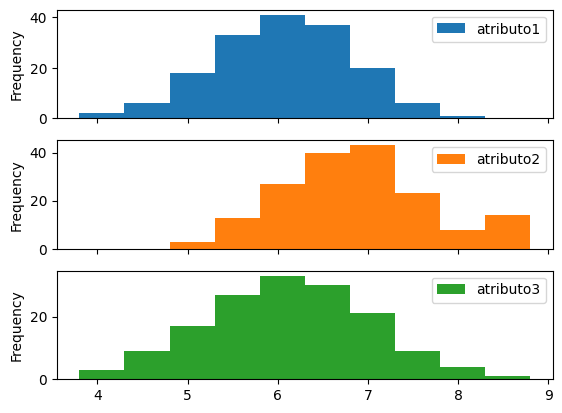

In [ ]:
data[vars].plot.hist(subplots=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

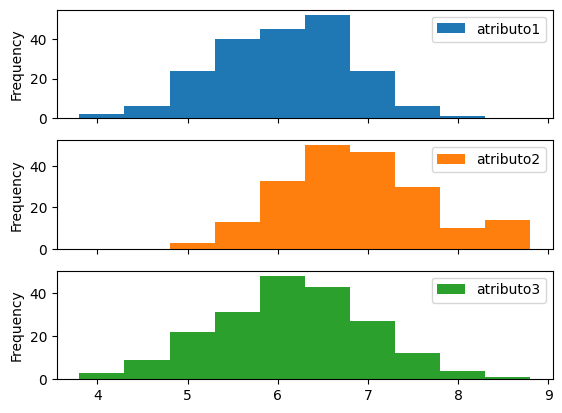

In [ ]:
data_imputed_knn[vars].plot.hist(subplots=True)

### Dispersion nueva

/tmp/ipython-input-1404883980.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[x].legend()


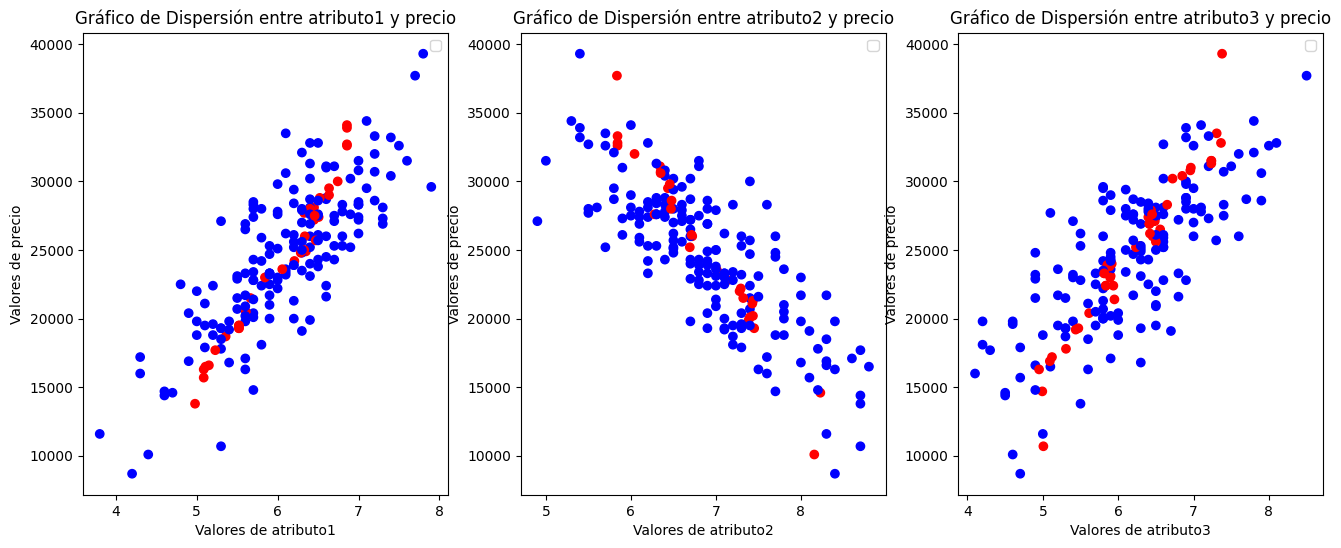

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
for x in range(0,3):
  axs[x].scatter(data_imputed_knn[vars[x]], data_imputed_knn['precio'], c=data.isnull()[vars[x]].map(col), marker='o')
  axs[x].set_xlabel(f'Valores de {vars[x]}')
  axs[x].set_ylabel('Valores de precio')
  axs[x].set_title(f'Gráfico de Dispersión entre {vars[x]} y precio')
  axs[x].legend()
plt.show()

In [ ]:
data[vars].std()

,0
atributo1,0.761859
atributo2,0.816468
atributo3,0.887770


In [ ]:
data_imputed_knn[vars].std()

,0
atributo1,0.735161
atributo2,0.796516
atributo3,0.842188


In [ ]:
data._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.582469,0.634946,0.793816
atributo2,-0.582469,1.000000,-0.573408,-0.806845
atributo3,0.634946,-0.573408,1.000000,0.747703
precio,0.793816,-0.806845,0.747703,1.000000


In [ ]:
data_imputed_knn._get_numeric_data().corr()

,atributo1,atributo2,atributo3,precio
atributo1,1.000000,-0.660374,0.670860,0.818150
atributo2,-0.660374,1.000000,-0.644200,-0.823182
atributo3,0.670860,-0.644200,1.000000,0.782817
precio,0.818150,-0.823182,0.782817,1.000000
